# Regression Project: Spain Electricity Shortfall Challenge


---

### Project Overview: Analyzing Spain's Electricity Shortfall

The Spanish government aims to expand its renewable energy infrastructure investments and requires insights into the trends and patterns of the country's renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

1. Analyze the provided data.
2. Identify and rectify potential errors in the data set.
3. Explore the possibility of enriching the data set by adding additional features.
4. Develop a forecasting model to predict three hourly demand shortfalls.
5. Evaluate the accuracy of the best machine learning model.
6. Determine the most influential features in the model's predictions.
7. Explain the model's functionality to a non-technical audience.


> In this project, the task is to model the shortfall between energy generated by fossil fuels and renewable sources in Spain. The daily shortfall, referred to as the target variable, will be modeled based on various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. Given that the provided features might not be sufficient predictors of the target variable, you are required to perform feature engineering to ensure accurate modeling of Spain's three hourly shortfalls.


<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [1]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
%matplotlib inline
import plotly.express as px



# Libraries for data preparation and model building
import sklearn
from scipy import stats
from scipy.stats import norm, skew
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, r2_score
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process.kernels import WhiteKernel, RBF
import xgboost as xgb
import catboost as cb
from catboost import CatBoostClassifier
from sklearn.linear_model import HuberRegressor, TheilSenRegressor
from sklearn.model_selection import GridSearchCV
import ptitprince as pt





# enhanced stats functions
from scipy import stats
from statsmodels.graphics.correlation import plot_corr
import statsmodels.formula.api as sm
from statsmodels.formula.api import ols
from scipy.stats import pearsonr
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge


# Setting global constants to ensure notebook results are reproducible
PARAMETER_CONSTANT = 42
import warnings
warnings.filterwarnings('ignore')

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [2]:
# load the data
df = pd.read_csv('df_train.csv')
df.head()

Unnamed: 0                 time  Madrid_wind_speed Valencia_wind_deg  \
0           0  2015-01-01 03:00:00           0.666667           level_5   
1           1  2015-01-01 06:00:00           0.333333          level_10   
2           2  2015-01-01 09:00:00           1.000000           level_9   
3           3  2015-01-01 12:00:00           1.000000           level_8   
4           4  2015-01-01 15:00:00           1.000000           level_7   

   Bilbao_rain_1h  Valencia_wind_speed  Seville_humidity  Madrid_humidity  \
0             0.0             0.666667         74.333333        64.000000   
1             0.0             1.666667         78.333333        64.666667   
2             0.0             1.000000         71.333333        64.333333   
3             0.0             1.000000         65.333333        56.333333   
4             0.0             1.000000         59.000000        57.000000   

   Bilbao_clouds_all  Bilbao_wind_speed  ...  Madrid_temp_max  Barcelona_temp  \
0                0.0           1.000000  ...       265.938000      281.013000   
1                0.0           1.000000  ...       266.386667      280.561667   
2                0.0           1.000000  ...       272.708667      281.583667   
3                0.0           1.000000  ...       281.895219      283.434104   
4                2.0           0.333333  ...       280.678437      284.213167   

   Bilbao_temp_min  Bilbao_temp  Barcelona_temp_min  Bilbao_temp_max  \
0       269.338615   269.338615          281.013000       269.338615   
1       270.376000   270.376000          280.561667       270.376000   
2       275.027229   275.027229          281.583667       275.027229   
3       281.135063   281.135063          283.434104       281.135063   
4       282.252063   282.252063          284.213167       282.252063   

   Seville_temp_min Madrid_temp  Madrid_temp_min  load_shortfall_3h  
0        274.254667  265.938000       265.938000        6715.666667  
1        274.945000  266.386667       266.386667        4171.666667  
2        278.792000  272.708667       272.708667        4274.666667  
3        285.394000  281.895219       281.895219        5075.666667  
4        285.513719  280.678437       280.678437        6620.666667  

[5 rows x 49 columns]

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [3]:
object_columns = df.select_dtypes(include=['object']).columns
print(object_columns)

Index(['time', 'Valencia_wind_deg', 'Seville_pressure'], dtype='object')


In [4]:
# look at data statistics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   object 
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

 The columns Valencia wind deg and Seville pressure are object dataype. <br>
 The time column is in the wrong format

<Axes: >

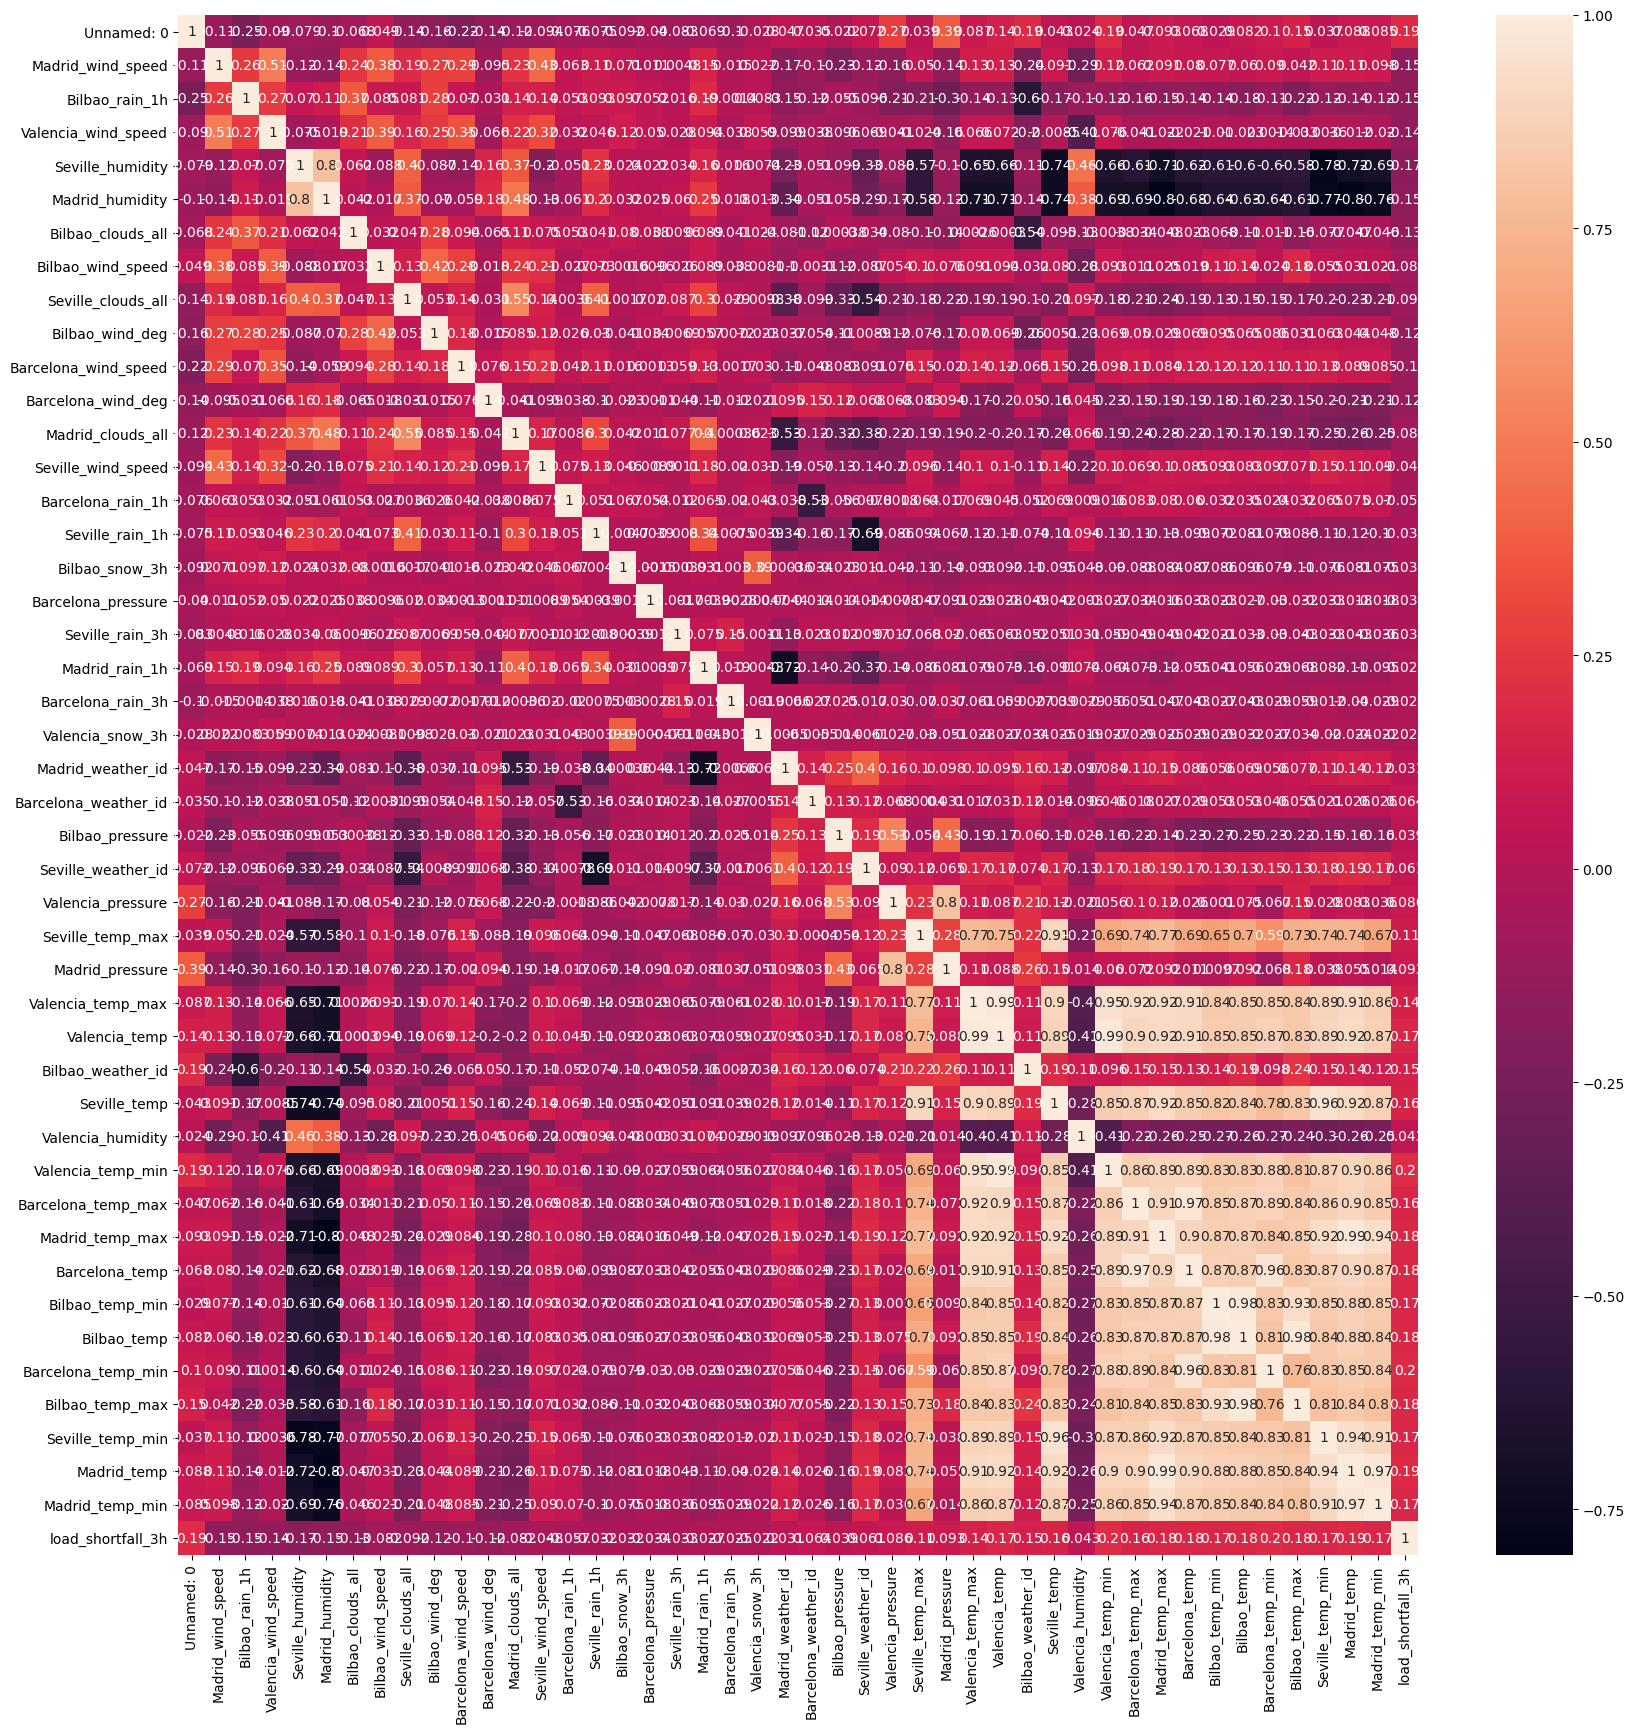

In [5]:
# plot relevant feature interactions
plt.figure(figsize=[20,20])
sns.heatmap(df.corr(), annot=True)

In [6]:
# evaluate correlation
correlation_matrix = df.corr()

# Print the correlation matrix
print(correlation_matrix.T)

                      Unnamed: 0  Madrid_wind_speed  Bilbao_rain_1h  \
Unnamed: 0              1.000000          -0.109288       -0.249633   
Madrid_wind_speed      -0.109288           1.000000        0.259719   
Bilbao_rain_1h         -0.249633           0.259719        1.000000   
Valencia_wind_speed    -0.090161           0.513092        0.265864   
Seville_humidity       -0.079025          -0.117892        0.069878   
Madrid_humidity        -0.103359          -0.137092        0.106765   
Bilbao_clouds_all      -0.068123           0.244001        0.370733   
Bilbao_wind_speed       0.049197           0.377854        0.085398   
Seville_clouds_all     -0.140583           0.191251        0.081131   
Bilbao_wind_deg        -0.155738           0.270950        0.279350   
Barcelona_wind_speed   -0.218781           0.294640        0.069997   
Barcelona_wind_deg     -0.140449          -0.095380       -0.030723   
Madrid_clouds_all      -0.116928           0.230126        0.135524   
Sevill

In [7]:
# have a look at feature distributions
df.describe().T

count          mean           std          min  \
Unnamed: 0            8763.0   4381.000000   2529.804538     0.000000   
Madrid_wind_speed     8763.0      2.425729      1.850371     0.000000   
Bilbao_rain_1h        8763.0      0.135753      0.374901     0.000000   
Valencia_wind_speed   8763.0      2.586272      2.411190     0.000000   
Seville_humidity      8763.0     62.658793     22.621226     8.333333   
Madrid_humidity       8763.0     57.414717     24.335396     6.333333   
Bilbao_clouds_all     8763.0     43.469132     32.551044     0.000000   
Bilbao_wind_speed     8763.0      1.850356      1.695888     0.000000   
Seville_clouds_all    8763.0     13.714748     24.272482     0.000000   
Bilbao_wind_deg       8763.0    158.957511    102.056299     0.000000   
Barcelona_wind_speed  8763.0      2.870497      1.792197     0.000000   
Barcelona_wind_deg    8763.0    190.544848     89.077337     0.000000   
Madrid_clouds_all     8763.0     19.473392     28.053660     0.000000   
Seville_wind_speed    8763.0      2.425045      1.672895     0.000000   
Barcelona_rain_1h     8763.0      0.128906      0.634730     0.000000   
Seville_rain_1h       8763.0      0.039439      0.175857     0.000000   
Bilbao_snow_3h        8763.0      0.031912      0.557264     0.000000   
Barcelona_pressure    8763.0   1377.964605  14073.140990   670.666667   
Seville_rain_3h       8763.0      0.000243      0.003660     0.000000   
Madrid_rain_1h        8763.0      0.037818      0.152639     0.000000   
Barcelona_rain_3h     8763.0      0.000439      0.003994     0.000000   
Valencia_snow_3h      8763.0      0.000205      0.011866     0.000000   
Madrid_weather_id     8763.0    773.527594     77.313315   211.000000   
Barcelona_weather_id  8763.0    765.979687     88.142235   200.666667   
Bilbao_pressure       8763.0   1017.739549     10.046124   971.333333   
Seville_weather_id    8763.0    774.658818     71.940009   200.000000   
Valencia_pressure     6695.0   1012.051407      9.506214   972.666667   
Seville_temp_max      8763.0    297.479527      8.875812   272.063000   
Madrid_pressure       8763.0   1010.316920     22.198555   927.666667   
Valencia_temp_max     8763.0    291.337233      7.565692   269.888000   
Valencia_temp         8763.0    290.592152      7.162274   269.888000   
Bilbao_weather_id     8763.0    724.722362    115.846537   207.333333   
Seville_temp          8763.0    293.978903      7.920986   272.063000   
Valencia_humidity     8763.0     65.247727     19.262322    10.333333   
Valencia_temp_min     8763.0    289.867648      6.907402   269.888000   
Barcelona_temp_max    8763.0    291.157644      7.273538   272.150000   
Madrid_temp_max       8763.0    289.540309      9.752047   264.983333   
Barcelona_temp        8763.0    289.855459      6.528111   270.816667   
Bilbao_temp_min       8763.0    285.017973      6.705672   264.483333   
Bilbao_temp           8763.0    286.422929      6.818682   267.483333   
Barcelona_temp_min    8763.0    288.447422      6.102593   269.483333   
Bilbao_temp_max       8763.0    287.966027      7.105590   269.063000   
Seville_temp_min      8763.0    291.633356      8.178220   270.150000   
Madrid_temp           8763.0    288.419439      9.346796   264.983333   
Madrid_temp_min       8763.0    287.202203      9.206237   264.983333   
load_shortfall_3h     8763.0  10673.857612   5218.046404 -6618.000000   

                              25%           50%           75%           max  
Unnamed: 0            2190.500000   4381.000000   6571.500000  8.762000e+03  
Madrid_wind_speed        1.000000      2.000000      3.333333  1.300000e+01  
Bilbao_rain_1h           0.000000      0.000000      0.100000  3.000000e+00  
Valencia_wind_speed      1.000000      1.666667      3.666667  5.200000e+01  
Seville_humidity        44.333333     65.666667     82.000000  1.000000e+02  
Madrid_humidity         36.333333     58.000000     78.666667  1.000000e+02  
Bilbao_clouds_all       10.000000     45.0000

From the above, the following can be deduced: <br>
<p>  The following columns have a very large value of mean: barcelona pressre, bilbao pressure, valencia pressure etc. This could means that there are outliers in the columns

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [8]:
# Look for missing values
df.isna().sum()

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

In the valencia pressure column, 2068 rows has missing values. This issue can be solve either by dropping of the missing rows or replacing them either with the mean or median

In [9]:
df.duplicated().sum()

0

In [10]:
columns_with_missing_values = df.columns[df.isnull().any()].tolist()

# Printing the columns with missing values
print("Columns with missing values:")
for column in columns_with_missing_values:
    print(column)

Columns with missing values:
Valencia_pressure


In [11]:
df.Valencia_pressure.mean()

1012.0514065222828

In [12]:
a = df.Valencia_pressure.mean()
df.Valencia_pressure = df.Valencia_pressure.fillna(a)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   object 
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

Now you can see that there are no missing data anymore. This is because ireplaced them with the average value of the entries of the columns 

(array([7.000e+01, 3.720e+02, 8.370e+02, 1.641e+03, 2.494e+03, 2.301e+03,
        9.000e+02, 1.400e+02, 7.000e+00, 1.000e+00]),
 array([-6618. , -2765.8,  1086.4,  4938.6,  8790.8, 12643. , 16495.2,
        20347.4, 24199.6, 28051.8, 31904. ]),
 <BarContainer object of 10 artists>)

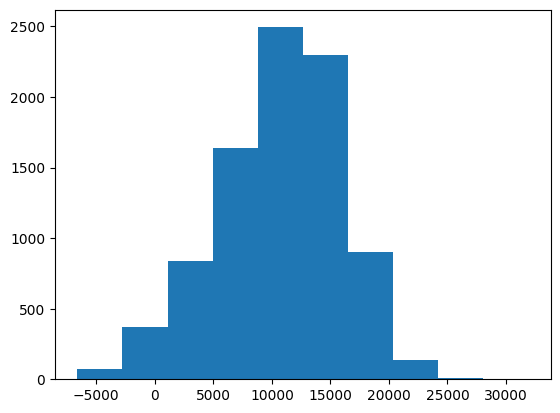

In [14]:
plt.hist(df['load_shortfall_3h'])

Since valencia wind deg and seville pressure are of categorical dtype, instead of numeric, they were transformed to numeric base on how the nature of their entry is

In [15]:
#Transforming Valencia_wind_deg to numeric
df['Valencia_wind_deg'] = df['Valencia_wind_deg'].str.extract('(\d+)').astype('int')
df['Seville_pressure'] = df['Seville_pressure'].str.extract('(\d+)').astype('int')


In [16]:
# Check for dist and possible outliers
df.kurtosis()

C:\Users\Dell\AppData\Local\Temp\ipykernel_7768\2134980169.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurtosis()


Unnamed: 0                -1.200000
Madrid_wind_speed          2.036462
Valencia_wind_deg         -1.186661
Bilbao_rain_1h            32.904656
Valencia_wind_speed       35.645426
Seville_humidity          -1.017983
Madrid_humidity           -1.167537
Bilbao_clouds_all         -1.533417
Bilbao_wind_speed          3.631565
Seville_clouds_all         2.155921
Bilbao_wind_deg           -1.083530
Barcelona_wind_speed       1.493635
Barcelona_wind_deg        -0.959160
Madrid_clouds_all          0.142079
Seville_wind_speed         1.398580
Barcelona_rain_1h        101.578931
Seville_pressure          -1.220040
Seville_rain_1h           93.840746
Bilbao_snow_3h           806.128471
Barcelona_pressure      3687.564230
Seville_rain_3h          413.136592
Madrid_rain_1h            76.584491
Barcelona_rain_3h        187.800460
Valencia_snow_3h        4089.323165
Madrid_weather_id          9.259047
Barcelona_weather_id       5.701882
Bilbao_pressure            1.825323
Seville_weather_id        10

13 columns have large nmbers of otliers. i.e kurtosis > 3.<br>
Some columns sch as barcelona pressure have an outrageous values compared to the actual values when compared. When compared to the highest pressure (1084) recorded in the state, 3687.56 is extremely high. This could be due to error whole entring the value. 


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='Barcelona_pressure'>

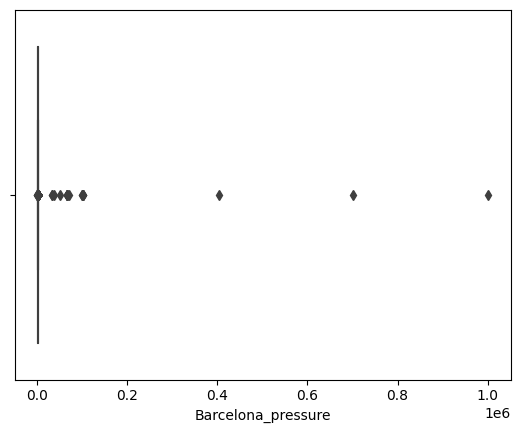

In [17]:
sns.boxplot(df['Barcelona_pressure'])

The boxplot shows that Barcelona_pressure has about seven outliers<br>
We then looked at values that are greater than the maximum pressure ever recorded (1084).

<Axes: xlabel='Valencia_wind_speed'>

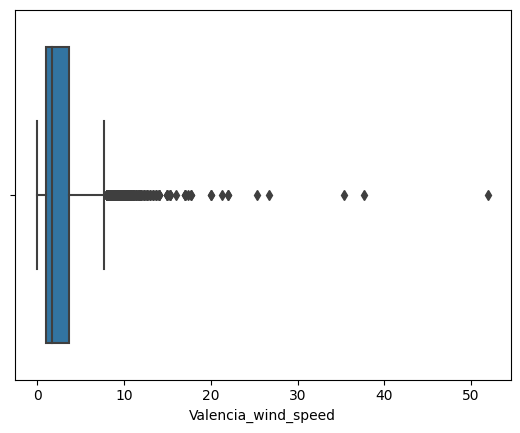

In [18]:
#Visualizing the Valencia_wind_speed data
sns.boxplot(x='Valencia_wind_speed', data=df)

We can see that there is a significant number of outliers in this feature

In [19]:
# Find the 75th and 25th percentiles
price_seventy_fifth = df["load_shortfall_3h"].quantile(0.75)
price_twenty_fifth = df["load_shortfall_3h"].quantile(0.25)

# Calculate iqr
prices_iqr = price_seventy_fifth - price_twenty_fifth

# Calculate the thresholds
upper = price_seventy_fifth + (1.5 * prices_iqr)
lower = price_twenty_fifth - (1.5 * prices_iqr)

# Subset the data
# planes = 
print(df[(df["load_shortfall_3h"] > lower) & (df["load_shortfall_3h"] < upper)])
print(df["load_shortfall_3h"].describe())

      Unnamed: 0                 time  Madrid_wind_speed  Valencia_wind_deg  \
0              0  2015-01-01 03:00:00           0.666667                  5   
1              1  2015-01-01 06:00:00           0.333333                 10   
2              2  2015-01-01 09:00:00           1.000000                  9   
3              3  2015-01-01 12:00:00           1.000000                  8   
4              4  2015-01-01 15:00:00           1.000000                  7   
...          ...                  ...                ...                ...   
8758        8758  2017-12-31 09:00:00           1.000000                  6   
8759        8759  2017-12-31 12:00:00           5.000000                  6   
8760        8760  2017-12-31 15:00:00           6.333333                  9   
8761        8761  2017-12-31 18:00:00           7.333333                  8   
8762        8762  2017-12-31 21:00:00           4.333333                  9   

      Bilbao_rain_1h  Valencia_wind_speed  Seville_

In [20]:
#Ploting time against Load_shortfall_3h to see relationship
fig = px.line(df, y = df['load_shortfall_3h'], x =df['time'], width =900, height=400 )
fig.show()

In [21]:
# create new features
df['time'] = pd.to_datetime(df['time'])

# Create new columns for year, month, day, hour, and minute
df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month
df['day'] = df['time'].dt.day
df['hour'] = df['time'].dt.hour
df['minute'] = df['time'].dt.minute


# Drop the original 'timestamp' column
df = df.drop(['time', 'Unnamed: 0'], axis=1)

<Axes: >

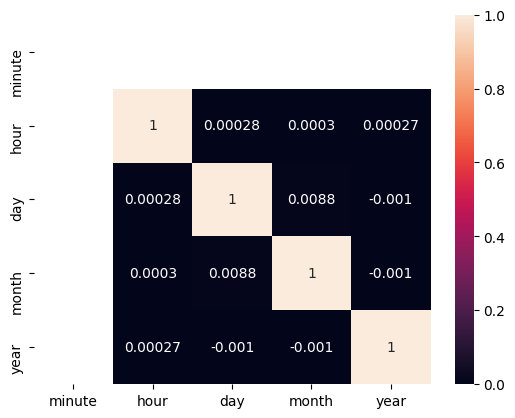

In [22]:
t = df.iloc[:, [-1,-2,-3,-4,-5]]
sns.heatmap(t.corr(), annot=True)

In [23]:
df.head()

Madrid_wind_speed  Valencia_wind_deg  Bilbao_rain_1h  Valencia_wind_speed  \
0           0.666667                  5             0.0             0.666667   
1           0.333333                 10             0.0             1.666667   
2           1.000000                  9             0.0             1.000000   
3           1.000000                  8             0.0             1.000000   
4           1.000000                  7             0.0             1.000000   

   Seville_humidity  Madrid_humidity  Bilbao_clouds_all  Bilbao_wind_speed  \
0         74.333333        64.000000                0.0           1.000000   
1         78.333333        64.666667                0.0           1.000000   
2         71.333333        64.333333                0.0           1.000000   
3         65.333333        56.333333                0.0           1.000000   
4         59.000000        57.000000                2.0           0.333333   

   Seville_clouds_all  Bilbao_wind_deg  ...  Bilbao_temp_max  \
0                 0.0       223.333333  ...       269.338615   
1                 0.0       221.000000  ...       270.376000   
2                 0.0       214.333333  ...       275.027229   
3                 0.0       199.666667  ...       281.135063   
4                 0.0       185.000000  ...       282.252063   

   Seville_temp_min  Madrid_temp  Madrid_temp_min  load_shortfall_3h  year  \
0        274.254667   265.938000       265.938000        6715.666667  2015   
1        274.945000   266.386667       266.386667        4171.666667  2015   
2        278.792000   272.708667       272.708667        4274.666667  2015   
3        285.394000   281.895219       281.895219        5075.666667  2015   
4        285.513719   280.678437       280.678437        6620.666667  2015   

   month  day  hour  minute  
0      1    1     3       0  
1      1    1     6       0  
2      1    1     9       0  
3      1    1    12       0  
4      1    1    15       0  

[5 rows x 52 columns]

In [24]:
df.hour.head()

0     3
1     6
2     9
3    12
4    15
Name: hour, dtype: int64

In [25]:
df = df.dropna()

In [26]:
df['load_shortfall_3h'] = df['load_shortfall_3h'].astype('int')

In [27]:
# split data
X = df.drop(columns=['load_shortfall_3h'], axis=1)
y = df['load_shortfall_3h']


# , 'Bilbao_weather_id', 'Barcelona_weather_id', 'Madrid_weather_id', 'Seville_weather_id'

In [28]:
X = X[['Madrid_wind_speed', 'Valencia_wind_deg', 'Bilbao_rain_1h',
       'Valencia_wind_speed', 'Seville_humidity', 'Madrid_humidity',
       'Bilbao_clouds_all', 'Bilbao_wind_speed', 'Seville_clouds_all',
       'Bilbao_wind_deg', 'Barcelona_wind_speed', 'Barcelona_wind_deg',
       'Madrid_clouds_all', 'Seville_wind_speed', 'Barcelona_rain_1h',
       'Seville_pressure', 'Seville_rain_1h', 'Bilbao_snow_3h',
       'Barcelona_pressure', 'Seville_rain_3h', 'Madrid_rain_1h',
       'Barcelona_rain_3h', 'Valencia_snow_3h', 'Madrid_weather_id',
       'Barcelona_weather_id', 'Bilbao_pressure', 'Seville_weather_id',
       'Valencia_pressure', 'Seville_temp_max', 'Bilbao_weather_id', 
        'Valencia_humidity', 'year', 'month', 'day', 'hour', 'minute']]

In [29]:
bestfit = SelectKBest(score_func=chi2, k=10)
fit = bestfit.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featscores = pd.concat([dfcolumns,dfscores], axis=1) 
featscores.columns = ['Features', 'Score']
new_X = featscores.sort_values('Score', ascending=False).head(41)
new_X.tail(11)

Features        Score
2      Bilbao_rain_1h  7544.581644
16    Seville_rain_1h  5397.681019
20     Madrid_rain_1h  4226.512446
22   Valencia_snow_3h  3110.383507
28   Seville_temp_max  1847.097423
25    Bilbao_pressure   682.609378
27  Valencia_pressure   473.028819
19    Seville_rain_3h   383.079442
21  Barcelona_rain_3h   247.853993
31               year     2.314342
35             minute          NaN

<Axes: >

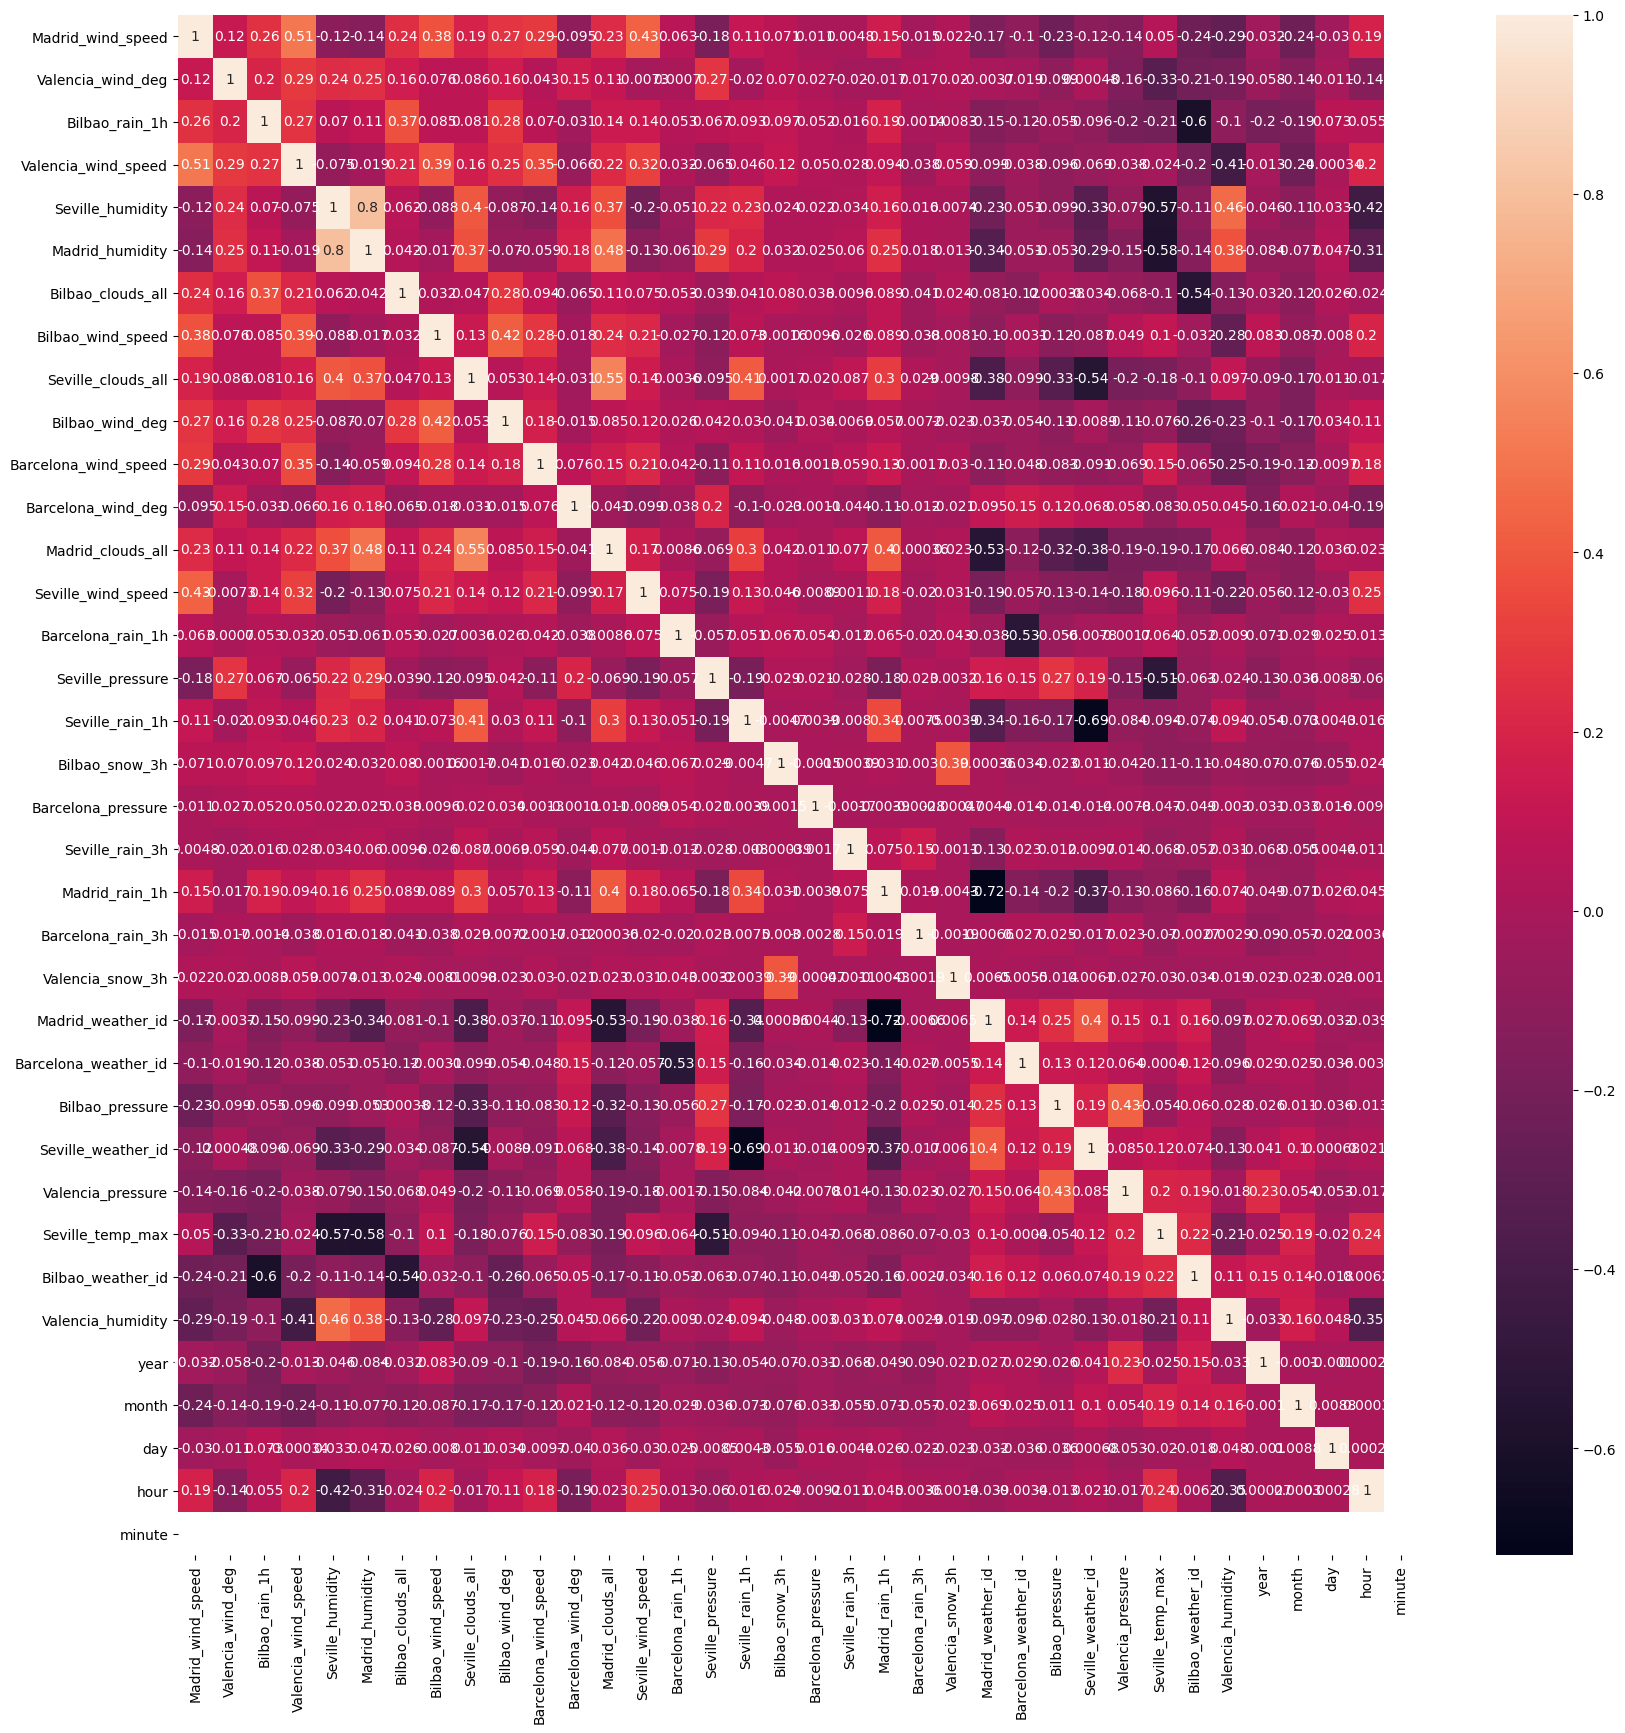

In [30]:
plt.figure(figsize=[20,20])
sns.heatmap(X.corr(), annot=True)

In [31]:
scaler = StandardScaler()

In [32]:
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

Madrid_wind_speed  Valencia_wind_deg  Bilbao_rain_1h  Valencia_wind_speed  \
0          -0.950708          -0.096053       -0.362123            -0.796169   
1          -1.130863           1.641580       -0.362123            -0.381412   
2          -0.770554           1.294054       -0.362123            -0.657917   
3          -0.770554           0.946527       -0.362123            -0.657917   
4          -0.770554           0.599000       -0.362123            -0.657917   

   Seville_humidity  Madrid_humidity  Bilbao_clouds_all  Bilbao_wind_speed  \
0          0.516117         0.270621          -1.335491          -0.501451   
1          0.692953         0.298017          -1.335491          -0.501451   
2          0.383491         0.284319          -1.335491          -0.501451   
3          0.118238        -0.044439          -1.335491          -0.501451   
4         -0.161751        -0.017043          -1.274045          -0.894581   

   Seville_clouds_all  Bilbao_wind_deg  ...  Seville_weather_id  \
0           -0.565065         0.630823  ...            0.352274   
1           -0.565065         0.607959  ...            0.352274   
2           -0.565065         0.542632  ...            0.352274   
3           -0.565065         0.398912  ...            0.352274   
4           -0.565065         0.255192  ...            0.352274   

   Valencia_pressure  Seville_temp_max  Bilbao_weather_id  Valencia_humidity  \
0      -1.129531e+00         -2.616796           0.649842           0.540928   
1      -9.289340e-01         -2.539014           0.649842           0.298645   
2      -8.085757e-01         -2.105564           0.649842           0.021750   
3      -3.672620e-01         -1.361703           0.649842          -0.583957   
4       2.736630e-13         -1.348214           0.649842          -0.358980   

       year     month       day      hour  minute  
0 -1.226179 -1.602429 -1.675368 -1.090901     0.0  
1 -1.226179 -1.602429 -1.675368 -0.654451     0.0  
2 -1.226179 -1.602429 -1.675368 -0.218001     0.0  
3 -1.226179 -1.602429 -1.675368  0.218449     0.0  
4 -1.226179 -1.602429 -1.675368  0.654899     0.0  

[5 rows x 36 columns]

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [33]:
# create targets and features dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
display(f'Training predictor: {X_train.shape}')
display(f'Training target: {y_train.shape}')
display(f'Testing predictor: {X_test.shape}')
display(f'Testing target: {y_test.shape}')

'Training predictor: (7010, 36)'

'Training target: (7010,)'

'Testing predictor: (1753, 36)'

'Testing target: (1753,)'

# Create one or more ML models

In [35]:
# Linear regression
reg = LinearRegression()
reg.fit(X_train,y_train)
predicts = reg.predict(X_test)
train_pred = reg.predict(X_train)

In [36]:
# Lasso model

lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
pred_lasso = lasso.predict(X_test)

In [37]:
# Ridge model
ridge = Ridge()
ridge.fit(X_train, y_train)
pred_ridge = ridge.predict(X_test)



In [38]:
# Decision Tree
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)
pred_tree = tree.predict(X_test)

In [39]:
# Random forest
rf = RandomForestRegressor(n_estimators=200, max_depth=8)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [40]:
# Elastic Net Regression
elastic_net = ElasticNet()
elastic_net.fit(X_train, y_train)
predictions_elastic_net = elastic_net.predict(X_test)



In [ ]:
# Polynomial Regression
polynomial_features = PolynomialFeatures(degree=4)
X_poly = polynomial_features.fit_transform(X_train)
poly_regression = LinearRegression()
poly_regression.fit(X_poly, y_train)
X_test_poly = polynomial_features.transform(X_test)
predictions_polynomial = poly_regression.predict(X_test_poly)


In [ ]:
# Support Vector Regression
svr = SVR()
svr.fit(X_train, y_train)
predictions_svr = svr.predict(X_test)


In [ ]:
# Gradient Boosting Regression
gradient_boosting = GradientBoostingRegressor()
gradient_boosting.fit(X_train, y_train)
predictions_gradient_boosting = gradient_boosting.predict(X_test)



In [ ]:
# Neural Network Regression
neural_network = MLPRegressor()
neural_network.fit(X_train, y_train)
predictions_neural_network = neural_network.predict(X_test)


In [ ]:
# Bayesian Regression
bayesian_regression = GaussianProcessRegressor()
bayesian_regression.fit(X_train, y_train)
predictions_bayesian = bayesian_regression.predict(X_test)


In [ ]:
# K-Nearest Neighbors Regression
knn_regression = KNeighborsRegressor()
knn_regression.fit(X_train, y_train)
predictions_knn = knn_regression.predict(X_test)



In [ ]:
# Gaussian Process Regression
gaussian_process = GaussianProcessRegressor(kernel=WhiteKernel() + RBF())
gaussian_process.fit(X_train, y_train)
predictions_gaussian_process = gaussian_process.predict(X_test)


In [ ]:
# CatBoost Regression
catboost = cb.CatBoostRegressor()
catboost.fit(X_train, y_train)
predictions_catboost = catboost.predict(X_test)


In [ ]:
# XGBoost Regression
xgboost = xgb.XGBRegressor()
xgboost.fit(X_train, y_train)
predictions_xgboost = xgboost.predict(X_test)



In [ ]:
# Huber Regression
huber_regression = HuberRegressor()
huber_regression.fit(X_train, y_train)
predictions_huber = huber_regression.predict(X_test)



In [ ]:
# Theil-Sen Regression
theil_sen_regression = TheilSenRegressor()
theil_sen_regression.fit(X_train, y_train)
pred_sneil = huber_regression.predict(X_test)

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [ ]:
#Comparing the True value and the Predicted Value of our models
lin = pd.DataFrame({'Actual': y_test, 'Predicted': predicts})
lass = pd.DataFrame({'Actual': y_test, 'Predicted': pred_lasso})
ridge = pd.DataFrame({'Actual': y_test, 'Predicted': pred_ridge})
des_tree = pd.DataFrame({'Actual': y_test, 'Predicted': pred_tree})
rf2 = pd.DataFrame({'Actual': y_test, 'Predicted': rf_pred})
elastic = pd.DataFrame({'Actual': y_test, 'Predicted': predictions_elastic_net})
poly = pd.DataFrame({'Actual': y_test, 'Predicted': predictions_polynomial}) 
svr = pd.DataFrame({'Actual': y_test, 'Predicted': predictions_svr})
grad= pd.DataFrame({'Actual': y_test, 'Predicted': predictions_gradient_boosting})
neural = pd.DataFrame({'Actual': y_test, 'Predicted': predictions_neural_network})
bay = pd.DataFrame({'Actual': y_test, 'Predicted': predictions_bayesian})
knn = pd.DataFrame({'Actual': y_test, 'Predicted': predictions_knn})
gaus = pd.DataFrame({'Actual': y_test, 'Predicted': predictions_gaussian_process})
xgb = pd.DataFrame({'Actual': y_test, 'Predicted': predictions_xgboost})
cat = pd.DataFrame({'Actual': y_test, 'Predicted': predictions_catboost})
hub = pd.DataFrame({'Actual': y_test, 'Predicted': predictions_huber})
theil = pd.DataFrame({'Actual': y_test, 'Predicted': pred_sneil})


In [ ]:
#Linear Model 
print(f'lin: {lin.head()}') 
print('\n')

# Lasso Model
print(f'lasso: {lass.head()}') 
print('\n')

# Ridge Model
print(f'ridge: {ridge.head()}') 
print('\n')

#Decision Tree Model
print(f'tree: {des_tree.head()}') 
print('\n')

# Random Forest Model
print(f'rand: {rf2.head()}') 
print('\n')

print(f'elastic: {elastic.head(10)}') 
print('\n')

print(f'poly: {poly.head(10)}') 
print('\n')

print(f'svr: {svr.head(10)}') 
print('\n')

print(f'grad: {grad.head(10)}') 
print('\n')

print(f'neural: {neural.head(10)}') 
print('\n')

print(f'bayessian: {bay.head(10)}') 
print('\n')


print(f'knn: {knn.head(10)}') 
print('\n')

print(f'gaus: {gaus.head(10)}') 
print('\n')

print(f'Xgb: {xgb.head(10)}') 
print('\n')

print(f'cat: {cat.head(10)}') 
print('\n')

print(f'hub: {hub.head(10)}') 
print('\n')

print(f'sneil: {theil.head(10)}') 
print('\n')

From the Predicted values above, we can see some models have values very close to the actual label, let us not get carried away as it doesn't tell the whole story.
<br>
Some of these results might be attributed to overfitting and also exposed to a lot of noise/outliers.
<br>
We will therefore test our model's performance based on the Metrics aforementioned in the previous cell.



## Comparing the Root Mean Square Error across Models

In [ ]:
Model_Performance = { 
    
                      'Test RMSE':
                    
                        {"Linear model": np.sqrt(mse(y_test,predicts)),
                        "Ridge": np.sqrt(mse(y_test,pred_ridge)),
                        "Lasso" : np.sqrt(mse(y_test,pred_lasso)),
                        "Decision Tree" : np.sqrt(mse(y_test,pred_tree)),
                        "Random Forest" : np.sqrt(mse(y_test,rf_pred)),
                        "elastic net regression": np.sqrt(mse(y_test,predictions_elastic_net)),
                        "polynomial": np.sqrt(mse(y_test,predictions_polynomial)),
                        "support vector" : np.sqrt(mse(y_test,predictions_svr)),
                        "gradient boosting" : np.sqrt(mse(y_test,predictions_gradient_boosting)),
                        "neural network" : np.sqrt(mse(y_test,predictions_neural_network)),
                        "bayesian": np.sqrt(mse(y_test,predictions_bayesian)),
                        "k-nearest neighbour": np.sqrt(mse(y_test,predictions_knn)),
                        "gaussian process" : np.sqrt(mse(y_test,predictions_gaussian_process)),
                        "Xgboost" : np.sqrt(mse(y_test,predictions_xgboost)),
                        "Catboost" : np.sqrt(mse(y_test,predictions_catboost)),
                        "Huber" : np.sqrt(mse(y_test,predictions_huber)),
                        "Theil-Sen" : np.sqrt(mse(y_test,pred_sneil))}
                        
                    }

# create dataframe from dictionary
Model_Performance = pd.DataFrame(data=Model_Performance)
Model_Performance

In [ ]:
px.bar(Model_Performance, y =Model_Performance['Test RMSE'],
       color = Model_Performance.index, width =700, height=400)


## Comparing the Mean Square Error across Models

In [ ]:
Model_Performance2 = { 
    
                      'Test MSE':
                    
                        {"Linear model": (mse(y_test,predicts)),
                        "Ridge": (mse(y_test,pred_ridge)),
                        "Lasso" : (mse(y_test,pred_lasso)),
                        "Decision Tree" : (mse(y_test,pred_tree)),
                        "Random Forest" : (mse(y_test,rf_pred)),
                        "elastic net regression": (mse(y_test,predictions_elastic_net)),
                        "polynomial": (mse(y_test,predictions_polynomial)),
                        "support vector" : (mse(y_test,predictions_svr)),
                        "gradient boosting" : (mse(y_test,predictions_gradient_boosting)),
                        "neural network" : (mse(y_test,predictions_neural_network)),
                        "bayesian": (mse(y_test,predictions_bayesian)),
                        "k-nearest neighbour": (mse(y_test,predictions_knn)),
                        "gaussian process" : (mse(y_test,predictions_gaussian_process)),
                        "XgBoost" : (mse(y_test,predictions_xgboost)),
                        "CatBoost" : (mse(y_test,predictions_catboost)),
                         "Huber" : (mse(y_test,predictions_huber)),
                        "Theil-Sen" : (mse(y_test,pred_sneil))}
                        
                    }

# create dataframe from dictionary
Model_Performance2 = pd.DataFrame(data=Model_Performance2)
Model_Performance2

In [ ]:
px.bar(Model_Performance, y =Model_Performance2['Test MSE'],
       color = Model_Performance.index, width =700, height=400)


## Comparing the Root Mean Absolute Error across Models

In [ ]:
Model_Performance3= { 
    
                      'Test MAE':
                    
                        {"Linear model": (mae(y_test,predicts)),
                        "Ridge": (mae(y_test,pred_ridge)),
                        "Lasso" : (mae(y_test,pred_lasso)),
                        "Decision Tree" : (mse(y_test,pred_tree)),
                        "Random Forest" : (mse(y_test,rf_pred)),
                         "elastic net regression": (mae(y_test,predictions_elastic_net)),
                        "polynomial": (mae(y_test,predictions_polynomial)),
                        "support vector" : (mae(y_test,predictions_svr)),
                        "gradient boosting" : (mae(y_test,predictions_gradient_boosting)),
                        "neural network" : (mae(y_test,predictions_neural_network)),
                        "bayesian": (mae(y_test,predictions_bayesian)),
                        "k-nearest neighbour": (mae(y_test,predictions_knn)),
                        "gaussian process" : (mae(y_test,predictions_gaussian_process)),
                        "XgBoost" : (mae(y_test,predictions_xgboost)),
                        "CatBoost" : (mae(y_test,predictions_catboost)),
                        "Huber" : (mae(y_test,predictions_huber)),
                        "Theil-Sen" : (mae(y_test,pred_sneil))}
                        
                    }

# create dataframe from dictionary
Model_Performance3 = pd.DataFrame(data=Model_Performance3)
Model_Performance3

In [ ]:
px.bar(Model_Performance3, y =Model_Performance3['Test MAE'],
       color = Model_Performance3.index, width =700, height=400)


## Comparing the R-Squared across Models

In [ ]:
Model_Performance4= { 
    
                      'Test R^2':
                    
                         {"Linear model": (r2_score(y_test,predicts)),
                        "Ridge": (r2_score(y_test,pred_ridge)),
                        "Lasso" : (r2_score(y_test,pred_lasso)),
                        "Decision Tree" : (r2_score(y_test,pred_tree)),
                        "Random Forest" : (r2_score(y_test,rf_pred)),
                         "Random Forest" : (r2_score(y_test,rf_pred)),
                        "elastic net regression": (r2_score(y_test,predictions_elastic_net)),
                        "polynomial": (r2_score(y_test,predictions_polynomial)),
                        "support vector" : (r2_score(y_test,predictions_svr)),
                        "gradient boosting" : (r2_score(y_test,predictions_gradient_boosting)),
                        "neural network" : (r2_score(y_test,predictions_neural_network)),
                        "bayesian": (r2_score(y_test,predictions_bayesian)),
                        "k-nearest neighbour": (r2_score(y_test,predictions_knn)),
                        "gaussian process" : (r2_score(y_test,predictions_gaussian_process)),
                        "XgBoost" : (r2_score(y_test,predictions_xgboost)),
                        "CatBoost" : (r2_score(y_test,predictions_catboost)),
                        "Huber" : (r2_score(y_test,predictions_huber)),
                        "Theil-Sen" : (r2_score(y_test,pred_sneil))}
                        
                    }

# create dataframe from dictionary
Model_Performance4 = pd.DataFrame(data=Model_Performance4)
Model_Performance4

In [ ]:
px.bar(Model_Performance4, y =Model_Performance4['Test R^2'],
       color = Model_Performance4.index, width =700, height=400)


From the graph above, we can confirm that the Random Forest model performs better than others in terms of R^2<br>

From all of these Results, we will choose Random Forest for our model Predictions as it meets all the expectations for a regression model and gives better performing metric<br>

Random Forest has a higher R2 for Test data as compared to the other models.,br>
Random Forest again has a lower RMSE for both the Training and Test data as compared to the other models.<br>
We can therefore conclude that Random Forest is the best model to use for prediction of 3 hourly load shortfall in Spain



<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

# Discuss chosen methods logic

Coefficient of determination (R2) measures the amount of variance in the predictions explained by the dataset.
It is the difference between the samples in the dataset and the predictions made by the model.
It is measure from zero to one with one representing a perfect model and zero showing that the model will perform badly on unseen data.
RMSE is the square root of the mean square error (MSE) which represents the average of the squared difference between the true and predicted values.
It measures the variance of the residuals, while the RMSE measures the standard deviation of the residuals.
The smaller the RMSE of the model the better.
 ## Choosen method's logic:
I began building the model using linear regression, but a linear model is not appropriate for data that is not linear, and it is also susceptible to multicollinearity. To address these issues, I decided to use XGBoost regression instead.

XGBoost is a powerful regression algorithm that combines the advantages of gradient boosting and decision trees. It can handle non-linear relationships between features and the target variable, and it is robust to multicollinearity. XGBoost also includes regularization techniques to prevent overfitting, such as shrinkage and tree pruning.

By using XGBoost, I was able to benefit from its ability to capture complex interactions between variables and handle non-linearities in the data. The algorithm automatically handles feature selection and can assign higher importance to the most informative features, which helps in reducing overfitting and improving model performance.

Furthermore, XGBoost is an ensemble method, meaning it combines the predictions of multiple individual models (decision trees) to make the final prediction. This ensemble approach reduces the risk of overfitting and improves the generalization capability of the model. It achieves this by aggregating the predictions of multiple weak models and producing a more accurate and robust prediction.

In summary, I chose XGBoost regression as it addresses the limitations of linear regression, handles non-linear relationships, multicollinearity, and overfitting. It leverages the strengths of gradient boosting and decision trees to provide a powerful and effective regression model for the given data.

# Working on Predicting Load_shortfall_3h

In [ ]:
df2 = pd.read_csv('df_test.csv')
df2.head()

In [ ]:
df2['time'] = pd.to_datetime(df2['time'])

# Create new columns for year, month, day, hour, and minute
df2['year'] = df2['time'].dt.year
df2['month'] = df2['time'].dt.month
df2['day'] = df2['time'].dt.day
df2['hour'] = df2['time'].dt.hour
df2['minute'] = df2['time'].dt.minute





In [ ]:
time = df2['time']
df2['Valencia_pressure'].fillna(df2['Valencia_pressure'].mean(), inplace = True)


df2 = df2[['Madrid_wind_speed', 'Valencia_wind_deg', 'Bilbao_rain_1h',
       'Valencia_wind_speed', 'Seville_humidity', 'Madrid_humidity',
       'Bilbao_clouds_all', 'Bilbao_wind_speed', 'Seville_clouds_all',
       'Bilbao_wind_deg', 'Barcelona_wind_speed', 'Barcelona_wind_deg',
       'Madrid_clouds_all', 'Seville_wind_speed', 'Barcelona_rain_1h',
       'Seville_pressure', 'Seville_rain_1h', 'Bilbao_snow_3h',
       'Barcelona_pressure', 'Seville_rain_3h', 'Madrid_rain_1h',
       'Barcelona_rain_3h', 'Valencia_snow_3h', 'Madrid_weather_id',
       'Barcelona_weather_id', 'Bilbao_pressure', 'Seville_weather_id',
       'Valencia_pressure', 'Seville_temp_max', 'Bilbao_weather_id', 
        'Valencia_humidity', 'year', 'month', 'day', 'hour', 'minute']]

In [ ]:
#Transforming Valencia_wind_deg to numeric
df2['Valencia_wind_deg'] = df2['Valencia_wind_deg'].str.extract('(\d+)').astype('int')
df2['Seville_pressure'] = df2['Seville_pressure'].str.extract('(\d+)').astype('int')


In [ ]:
df2['load_shortfall_3h'] = xgboost.predict(df2)

In [ ]:
df2['time'] = time
save_data = df2[['time','load_shortfall_3h']]
save_data.to_csv(r'C:\Users\Dell\Documents\Data Science\Explore\submission_load_shortfall(3).csv', index=False)
save_data.head(20)